<a href="https://colab.research.google.com/github/akso1234/2024-1-my-BDA/blob/main/%EB%B2%94%EC%A3%84_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 범죄 공공데이터 분석

### 사용한 데이터 (2023 기준)
경찰청_범죄 발생 지역별 통계.csv   
경찰청_범죄 발생 장소별 통계.csv

In [1]:
# 사용할 모듈 설치 및 확인
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2


In [2]:
# 그래프 한글 처리를 위한 koreanize_matplotlib 설치
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.2 MB/s eta 0:00:00


In [3]:
# 사용할 csv 파일 불러오기 (지역별 통계)
Crime_region_data = pd.read_csv("경찰청_범죄 발생 지역별 통계.csv")

# 원본 데이터 보존을 위해 새로 선언
Crime_region = Crime_region_data.copy()

# csv 파일 확인
Crime_region.sample(10)

,범죄대분류,범죄중분류,서울,부산,대구,인천,광주,대전,울산,세종,...,경남 밀양,경남 사천,경남 양산,경남 진주,경남 창원,경남 통영,제주 서귀포,제주 제주,기타도시,도시이외
35,선거범죄,선거범죄,213,80,63,59,42,26,48,8,...,3,19,2,18,27,9,9,32,7,412
8,절도범죄,절도범죄,39182,14373,8169,9473,4832,5540,3349,588,...,246,206,984,1723,3377,412,858,2124,49,8442
11,폭력범죄,체포감금,202,78,53,117,38,36,19,2,...,3,2,7,3,23,2,3,19,0,64
22,지능범죄,유가증권인지,61,14,52,9,0,2,7,0,...,0,0,1,0,0,1,1,1,1,5
32,교통범죄,교통범죄,61132,22894,22200,18173,13779,11967,9956,1398,...,741,926,2275,1944,6683,1350,2378,6417,319,30914
30,보건범죄,보건범죄,2886,1441,357,452,250,173,77,9,...,47,30,60,76,274,33,68,56,19,660
10,폭력범죄,폭행,34321,10409,6821,11711,5004,5713,3757,301,...,144,253,628,820,2882,376,588,2041,46,6403
37,기타범죄,기타범죄,41780,19334,8076,12918,4552,5199,4672,646,...,467,555,1128,888,3728,1480,1240,3189,1577,20941
34,안보범죄,안보범죄,29,0,5,4,2,0,1,0,...,0,0,1,0,1,0,0,0,2,4
25,지능범죄,배임,1009,290,119,189,82,75,87,5,...,6,12,30,20,69,10,10,44,33,284


### 사람이 상대적으로 많이 거주하는 서울 / 수도권 (인천, 경기) / 부산 지역의 데이터 추출

### 서울

In [4]:
# 1. 서울
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 서울의 범죄 데이터 값만 추출할 수 있도록 설정
Seoul_crime = Crime_region[['범죄대분류', '범죄중분류', '서울']]
Seoul_crime = Seoul_crime.groupby('범죄대분류')['서울'].agg('sum').reset_index()

Seoul_crime


,범죄대분류,서울
0,강력범죄,6974
1,교통범죄,61132
2,기타범죄,41780
3,노동범죄,183
4,마약범죄,1544
5,병역범죄,3383
6,보건범죄,2886
7,선거범죄,213
8,안보범죄,29
9,절도범죄,39182


0      6974
1     61132
10    74668
12    56090
9     39182
2     41780
Name: 서울, dtype: int64


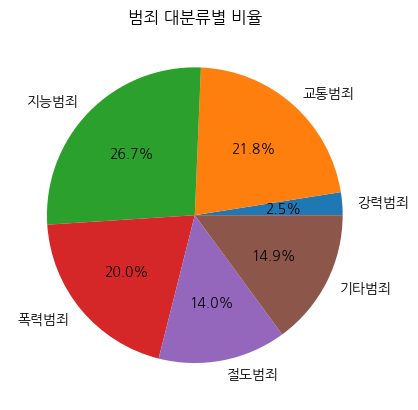

In [12]:
# 종류가 많거나 범죄의 수가 많은 6가지의 대표 범죄를 설정 (기본값)
selected_crimes = ['강력범죄', '교통범죄', '지능범죄', '폭력범죄', '절도범죄', '기타범죄']
Seoul_crime = Seoul_crime[Seoul_crime['범죄대분류'].isin(selected_crimes)]

# 선택한 범죄 주제를 그대로 유지하기 위해 범죄대분류를 범주형으로 변환하되, 순서를 명시적으로 지정
Seoul_crime['범죄대분류'] = pd.Categorical(Seoul_crime['범죄대분류'], categories=selected_crimes, ordered=True)
Seoul_crime = Seoul_crime.sort_values('범죄대분류')

# 그래프 속성 설정
print(Seoul_crime['서울'])
plt.pie(Seoul_crime['서울'], labels= Seoul_crime['범죄대분류'], autopct='%.1f%%')
plt.title('범죄 대분류별 비율')

plt.show()

### 가장 많은 지능 범죄를 세분화

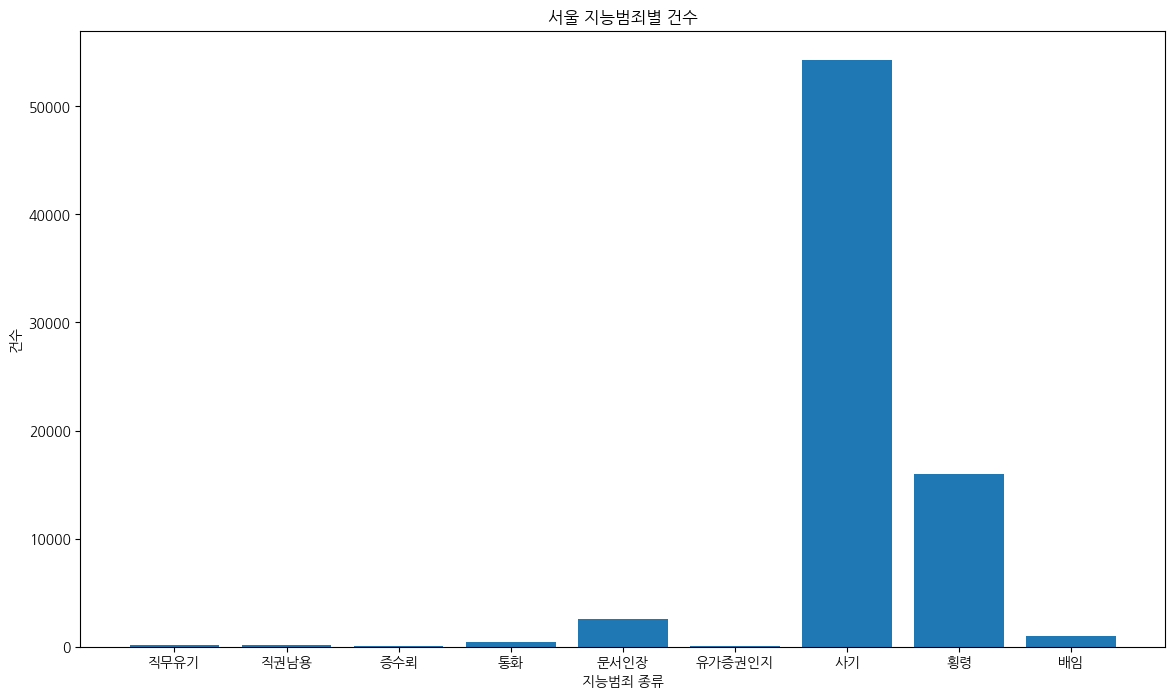

In [14]:
# Crime_region (지역별 범죄 통계 데이터) 에서 지능범죄만 추출
Crime_region = Crime_region[Crime_region['범죄대분류'] == '지능범죄']

# 지능범죄의 종류와 값을 추출
Seoul_intel_crime = Crime_region[['범죄중분류', '서울']]

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.bar(Seoul_intel_crime['범죄중분류'], Seoul_intel_crime['서울'])
plt.xlabel('지능범죄 종류')
plt.ylabel('건수')
plt.title('서울 지능범죄별 건수')

plt.show()

In [15]:
# 사용할 csv 파일 불러오기 (장소별 통계)
Crime_location_data = pd.read_csv("경찰청_범죄 발생 장소별 통계.csv")

# 원본 데이터 보존을 위해 새로 선언
Crime_location = Crime_location_data.copy()

# csv 파일 확인
Crime_location.sample(10)

,범죄대분류,범죄중분류,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
24,지능범죄,횡령,2218,759,125,24087,261,785,1217,200,...,65,103,5,1,1,5,1032,1068,169,11262
9,폭력범죄,상해,4160,2570,35,9150,13,88,126,12,...,61,130,22,14,5,6,592,51,53,1859
4,강력범죄,유사강간,240,147,2,57,1,0,0,0,...,2,5,0,0,2,0,7,12,1,111
36,병역범죄,병역범죄,317,411,0,212,0,0,0,0,...,0,0,0,405,0,1,0,0,0,2856
21,지능범죄,문서?인장,255,228,17,780,3,11,213,11,...,13,17,95,16,1,1,92,0,23,5148
17,지능범죄,직무유기,24,18,0,116,0,0,1,0,...,2,11,1,3,5,0,2,0,2,490
23,지능범죄,사기,9443,12024,856,43369,130,355,1863,73,...,135,284,47,85,15,19,1188,4,237,197773
14,폭력범죄,폭력행위등,600,322,3,3084,3,8,35,2,...,43,34,1,16,1,2,213,25,14,571
26,풍속범죄,성풍속범죄,3382,2049,9,2214,20,46,78,17,...,4,20,0,24,2,0,46,925,265,10622
32,교통범죄,교통범죄,106,37,7471,230183,0,2,3,0,...,1,51,64,0,0,3,692,0,0,2088


In [16]:
Crime_location = Crime_location[Crime_location['범죄중분류'] == '사기']

# 장소를 특정할 수 없는 '기타' 값 제외
Crime_location = Crime_location.drop(columns=['기타'])

# 값을 추출하기 위해 사용하지 않는 '범죄대분류'와 '범죄중분류' 값을 제외
Crime_location = Crime_location.drop(columns=['범죄대분류', '범죄중분류'])

Crime_location

,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,시장_노점,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
23,9443,12024,856,43369,130,355,1863,73,5087,1199,...,1286,135,284,47,85,15,19,1188,4,237


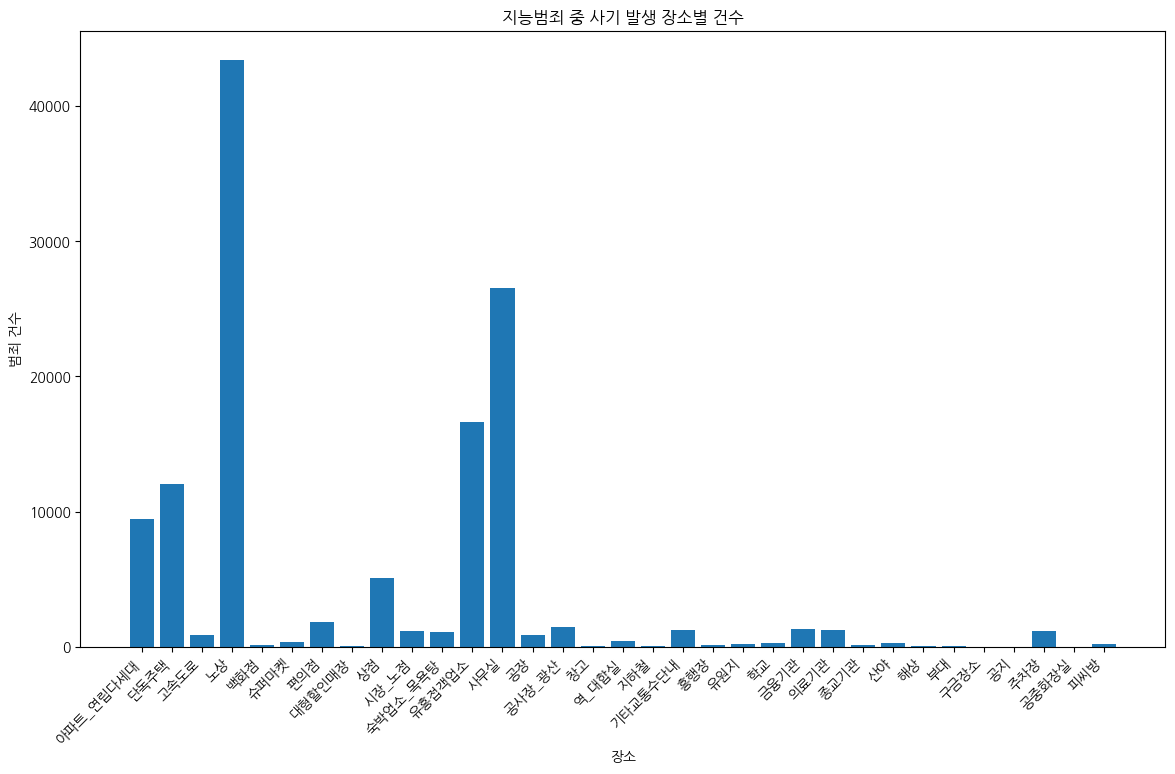

In [17]:
# 장소와 장소에 따른 값을 추출
locations = list(Crime_location.columns)
crime_counts = list(Crime_location.iloc[0])

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.bar(locations, crime_counts)
plt.xticks(rotation=45, ha='right') # 가로 값을 모두 보기 위해 45도 기울임
plt.xlabel('장소')
plt.ylabel('범죄 건수')
plt.title('지능범죄 중 사기 발생 장소별 건수')

plt.show()

### 수도권 (인천, 경기)

In [18]:
# 2. 수도권
import matplotlib.pyplot as plt
import koreanize_matplotlib

Crime_region = Crime_region_data.copy()

# 경기로 시작하는 열들을 합산하여 새로운 열 이름인 '경기' 생성
Crime_region['경기'] = Crime_region.filter(like='경기').sum(axis=1)

# 인천과 경기 열을 합산하여 '수도권' 열 생성
Crime_region['수도권'] = Crime_region['인천'] + Crime_region['경기']

# 인천과 경기권의 범죄 데이터 값만 추출할 수 있도록 설정
Crime_region = Crime_region[['범죄대분류', '범죄중분류', '수도권']]
Metro_crime = Crime_region.groupby('범죄대분류')['수도권'].agg('sum').reset_index()

Metro_crime

,범죄대분류,수도권
0,강력범죄,7409
1,교통범죄,125189
2,기타범죄,62062
3,노동범죄,411
4,마약범죄,1776
5,병역범죄,5078
6,보건범죄,2967
7,선거범죄,372
8,안보범죄,15
9,절도범죄,49992


<ipython-input-19-982cce5aab18>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Metro_crime['범죄대분류'] = pd.Categorical(Metro_crime['범죄대분류'], categories=selected_crimes, ordered=True)


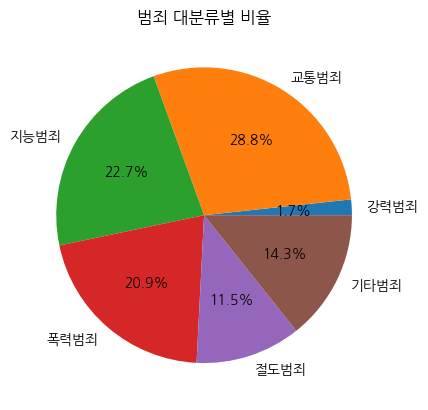

In [19]:
# 종류가 많거나 범죄의 수가 많은 6가지의 대표 범죄를 설정 (기본값)
selected_crimes = ['강력범죄', '교통범죄', '지능범죄', '폭력범죄', '절도범죄', '기타범죄']
Metro_crime = Metro_crime[Metro_crime['범죄대분류'].isin(selected_crimes)]

# 선택한 범죄 주제를 그대로 유지하기 위해 범죄대분류를 범주형으로 변환하되, 순서를 명시적으로 지정
Metro_crime['범죄대분류'] = pd.Categorical(Metro_crime['범죄대분류'], categories=selected_crimes, ordered=True)
Metro_crime = Metro_crime.sort_values('범죄대분류')

# 그래프 속성 설정
plt.pie(Metro_crime['수도권'], labels= Metro_crime['범죄대분류'], autopct='%.1f%%')
plt.title('범죄 대분류별 비율')

plt.show()

### 교통범죄는 세부 데이터가 존재하지 않음

In [20]:
# 교통범죄의 장소별 건수 확인
Crime_location = Crime_location_data.copy()
Crime_location = Crime_location[Crime_location['범죄중분류'] == '교통범죄']

# 장소를 특정할 수 없는 '기타' 값 제외
Crime_location = Crime_location.drop(columns=['기타'])

# 값을 추출하기 위해 사용하지 않는 '범죄대분류'와 '범죄중분류' 값을 제외
Crime_location = Crime_location.drop(columns=['범죄대분류', '범죄중분류'])

Crime_location

,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,시장_노점,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
32,106,37,7471,230183,0,2,3,0,48,53,...,7,1,51,64,0,0,3,692,0,0


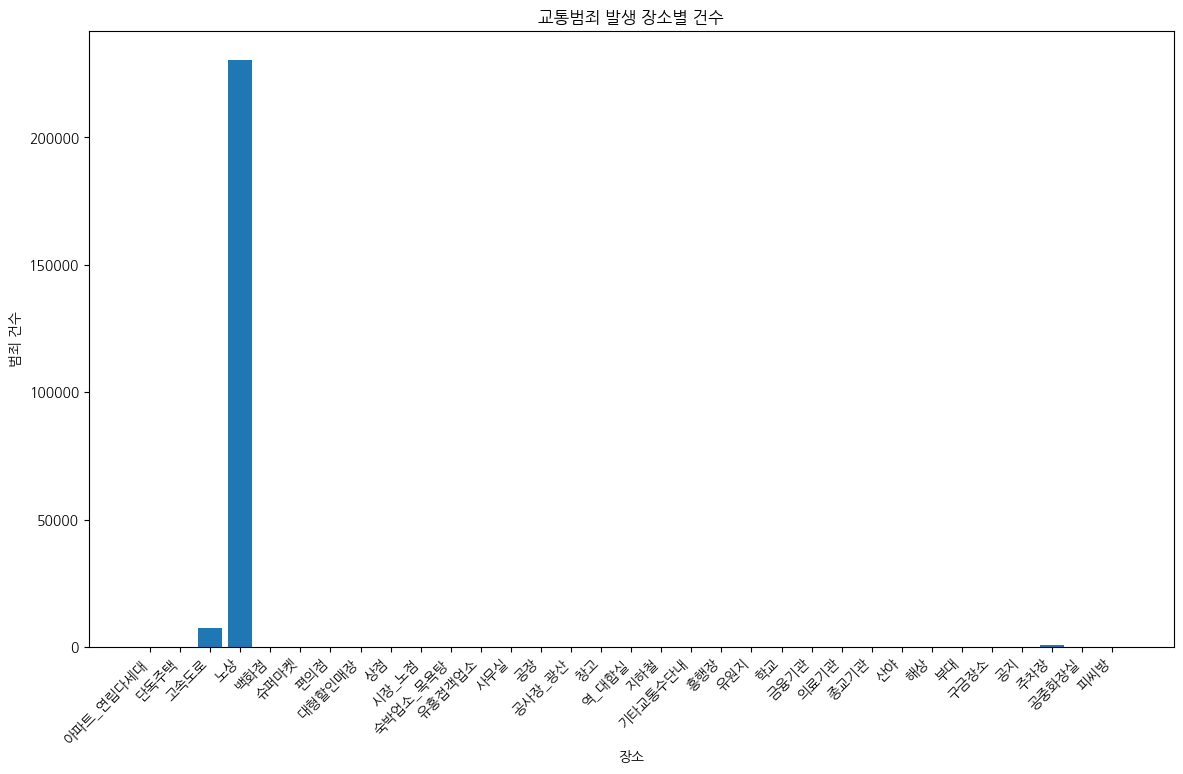

In [21]:
# 장소와 장소에 따른 값을 추출
locations = list(Crime_location.columns)
crime_counts = list(Crime_location.iloc[0])

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.bar(locations, crime_counts)
plt.xticks(rotation=45, ha='right') # 가로 값을 모두 보기 위해 45도 기울임
plt.xlabel('장소')
plt.ylabel('범죄 건수')
plt.title('교통범죄 발생 장소별 건수')

plt.show()

### 부산

In [23]:
# 3. 부산
import matplotlib.pyplot as plt
import koreanize_matplotlib

Crime_region = Crime_region_data.copy()

# 부산의 범죄 데이터 값만 추출할 수 있도록 설정
Busan_crime = Crime_region[['범죄대분류', '범죄중분류', '부산']]
Busan_crime = Busan_crime.groupby('범죄대분류')['부산'].agg('sum').reset_index()

Busan_crime

,범죄대분류,부산
0,강력범죄,1712
1,교통범죄,22894
2,기타범죄,19334
3,노동범죄,59
4,마약범죄,768
5,병역범죄,632
6,보건범죄,1441
7,선거범죄,80
8,안보범죄,0
9,절도범죄,14373


<ipython-input-24-9c532d4a6c38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Busan_crime['범죄대분류'] = pd.Categorical(Busan_crime['범죄대분류'], categories=selected_crimes, ordered=True)


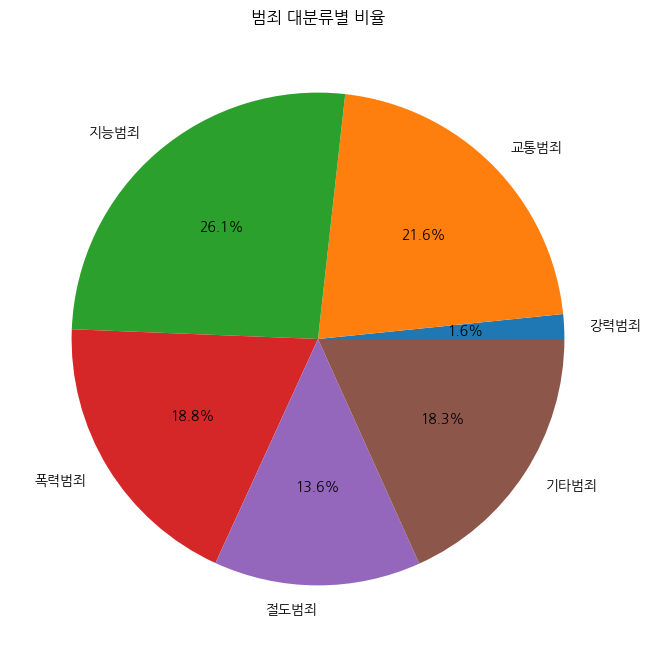

In [24]:
# 종류가 많거나 범죄의 수가 많은 6가지의 대표 범죄를 설정 (기본값)
selected_crimes = ['강력범죄', '교통범죄', '지능범죄', '폭력범죄', '절도범죄', '기타범죄']
Busan_crime = Busan_crime[Busan_crime['범죄대분류'].isin(selected_crimes)]

# 선택한 범죄 주제를 그대로 유지하기 위해 범죄대분류를 범주형으로 변환하되, 순서를 명시적으로 지정
Busan_crime['범죄대분류'] = pd.Categorical(Busan_crime['범죄대분류'], categories=selected_crimes, ordered=True)
Busan_crime = Busan_crime.sort_values('범죄대분류')

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.pie(Busan_crime['부산'], labels= Busan_crime['범죄대분류'], autopct='%.1f%%')
plt.title('범죄 대분류별 비율')

plt.show()

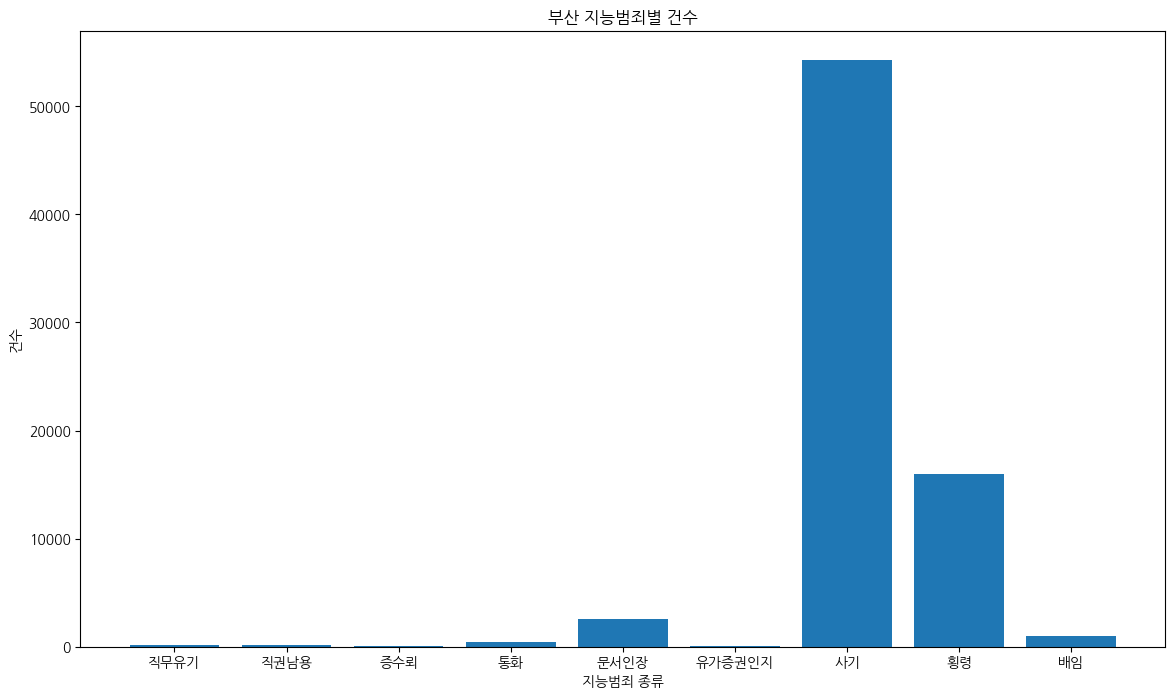

In [25]:
# Crime_region (지역별 범죄 통계 데이터) 에서 지능범죄만 추출
Crime_region = Crime_region[Crime_region['범죄대분류'] == '지능범죄']

# 지능범죄의 종류와 값을 추출
Busan_intel_crime = Crime_region[['범죄중분류', '서울']]

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.bar(Busan_intel_crime['범죄중분류'], Busan_intel_crime['서울'])
plt.xlabel('지능범죄 종류')
plt.ylabel('건수')
plt.title('부산 지능범죄별 건수')

plt.show()

In [26]:
Crime_location = Crime_location_data.copy()
Crime_location = Crime_location[Crime_location['범죄중분류'] == '사기']

# 장소를 특정할 수 없는 '기타' 값 제외
Crime_location = Crime_location.drop(columns=['기타'])

# 값을 추출하기 위해 사용하지 않는 '범죄대분류'와 '범죄중분류' 값을 제외
Crime_location = Crime_location.drop(columns=['범죄대분류', '범죄중분류'])

Crime_location

,아파트_연립다세대,단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,시장_노점,...,의료기관,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방
23,9443,12024,856,43369,130,355,1863,73,5087,1199,...,1286,135,284,47,85,15,19,1188,4,237


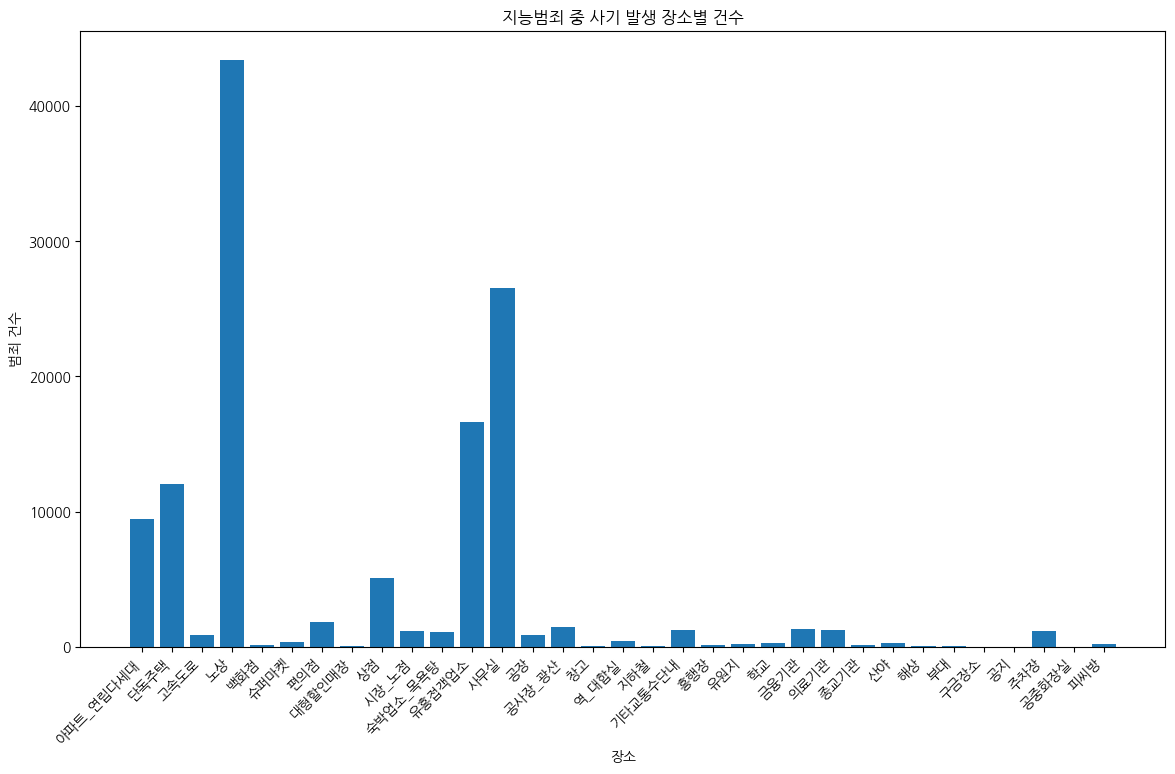

In [27]:
# 장소와 장소에 따른 값을 추출
locations = list(Crime_location.columns)
crime_counts = list(Crime_location.iloc[0])

# 그래프 속성 설정
plt.figure(figsize=(14, 8))
plt.bar(locations, crime_counts)
plt.xticks(rotation=45, ha='right') # 가로 값을 모두 보기 위해 45도 기울임
plt.xlabel('장소')
plt.ylabel('범죄 건수')
plt.title('지능범죄 중 사기 발생 장소별 건수')

plt.show()